<a href="https://colab.research.google.com/github/ShubhamCJagtap/Capstone_Project_1_EDA/blob/master/CAPSTONE_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamCJagtap/Capstone_Project_1_EDA/master/Final_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Saturday,22
1,194,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Sunday,1
2,388,1630972,2.973348e+18,2016-05-03 00:07:34,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Tuesday,0
3,582,2732453,2.973348e+18,2016-05-01 06:15:59,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Sunday,6
4,776,1562542,2.973348e+18,2016-05-01 20:34:19,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Sunday,20


# Questions for EDA


1. Distribution of Users(device_id) across States.


2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).


3. Distribution of Users across Gender.


4. Distribution of Users across Age Segments.


5. Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender.


6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands).


7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands).



Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.


8. Hourly distribution of Phone Calls.


9. Plot the Users on the Map using any suitable package.

In [4]:
locations = (df[['latitude','longitude']].value_counts().index).tolist()

In [5]:
locations[:10]

[(13.168106, 80.360389),
 (22.802167, 75.930756),
 (22.787895, 75.947327),
 (18.581989, 73.92591900000002),
 (19.048552, 72.88949299999999),
 (28.714736, 77.29105799999998),
 (13.176652, 80.317379),
 (28.721299, 77.25139499999997),
 (22.806684, 75.87469300000002),
 (22.790444, 75.946201)]

In [6]:
mapit = None
# latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
mapit = folium.Map( location=[22.00, 75.00], zoom_start=6 )
for coord in locations:
    # mapit = folium.Map( location=[ coord[0], coord[1] ] )
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

mapit

Distribution of Users(device_id) across States.

In [7]:
df.head(2)

,Unnamed: 0,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Saturday,22
1,194,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Sunday,1


In [8]:
df_1 = df.drop(['Unnamed: 0'], axis=1)

In [9]:
df_1.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Saturday,22
1,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Sunday,1


In [10]:
df_1.groupby('state')['device_id'].agg('count').reset_index()

,state,device_id
0,AndhraPradesh,785
1,ArunachalPradesh,110
2,Assam,9
3,Bihar,300
4,Chandigarh,3
5,Chhattisgarh,50
6,Delhi,2328
7,Goa,7
8,Gujarat,707
9,Haryana,279


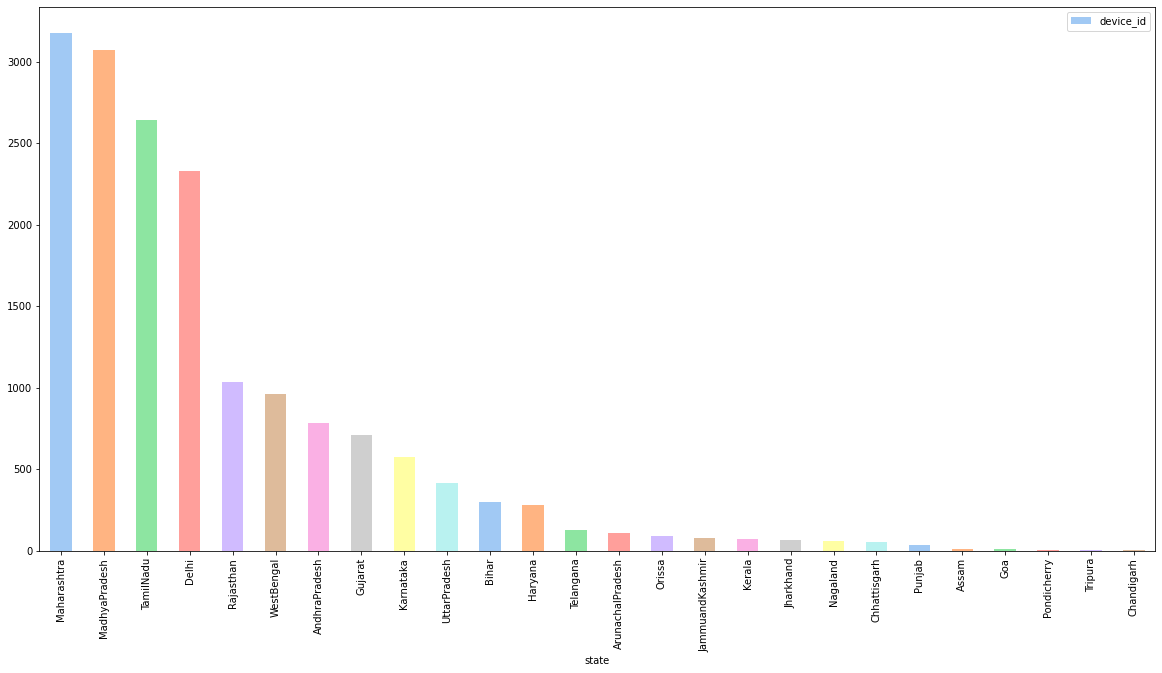

In [15]:
df_1.groupby('state')['device_id'].agg('count').sort_values(ascending=False).reset_index().plot.bar(x= 'state', y = 'device_id', figsize = (20, 10), color=sns.color_palette('pastel'))

Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [16]:
df_1.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Saturday,22
1,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,优米,UIMI3,2016,5,May,Sunday,1





  
Brand Name	Brand English Mapping
'华为'	'Huawei'
'小米'	'Xiaomi'
'三星'	'Samsung'
'vivo'	'vivo'
'OPPO'	'OPPO'
'魅族'	'Meizu'
'酷派'	'Coolpad'
'乐视'	'LeEco'
'联想 '	'Lenovo'
'HTC'	'HTC'



In [17]:
df_1['phone_brand'] = df_1['phone_brand'].replace(['华为','小米', '三星', 'vivo', 'OPPO', '魅族', '酷派', '乐视', '联想', 'HTC', '优米'],['Huawei','Xiaomi', 'Samsung', 'vivo', 'OPPO', 'Meizu', 'Coolpad', 'LeEco', 'Lenovo', 'HTC', 'yōu mǐ'])

In [18]:
df_1.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Saturday,22
1,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Sunday,1
2,1630972,2.973348e+18,2016-05-03 00:07:34,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Tuesday,0
3,2732453,2.973348e+18,2016-05-01 06:15:59,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Sunday,6
4,1562542,2.973348e+18,2016-05-01 20:34:19,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Sunday,20


In [19]:
df_phone_brand= df_1.groupby('phone_brand')['device_id'].agg('count').reset_index()

In [20]:
df_phone_brand_sel = df_phone_brand.sort_values(by='device_id',ascending=False)

In [21]:
df_phone_brand_sel

,phone_brand,device_id
8,Samsung,4704
9,Xiaomi,4403
2,Huawei,2116
10,vivo,1781
7,OPPO,1103
6,Meizu,955
0,Coolpad,759
1,HTC,336
4,LeEco,287
11,yōu mǐ,194


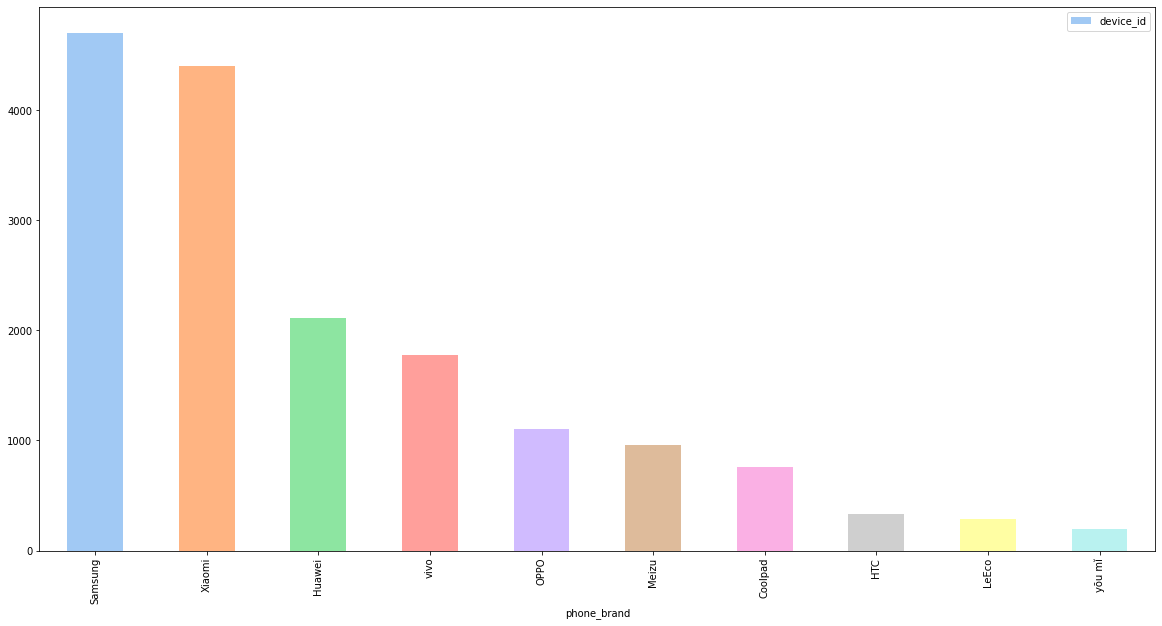

In [22]:
df_phone_brand_sel.loc[(df_phone_brand_sel['device_id'] > 100)].plot.bar(x= 'phone_brand', y = 'device_id', figsize = (20, 10), color=sns.color_palette('pastel'))

Distribution of Users across Gender.

In [23]:
df_1.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Saturday,22
1,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Sunday,1


In [24]:
df_1.groupby('gender')['device_id'].agg('count').reset_index()

,gender,device_id
0,F,5136
1,M,11846


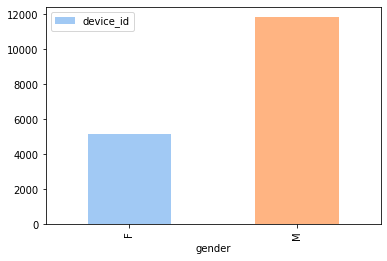

In [25]:
df_1.groupby('gender')['device_id'].agg('count').reset_index().plot.bar(x= 'gender', y = 'device_id', color=sns.color_palette('pastel'))

Distribution of Users across Age Segments

In [26]:
df_1.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Saturday,22
1,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Sunday,1


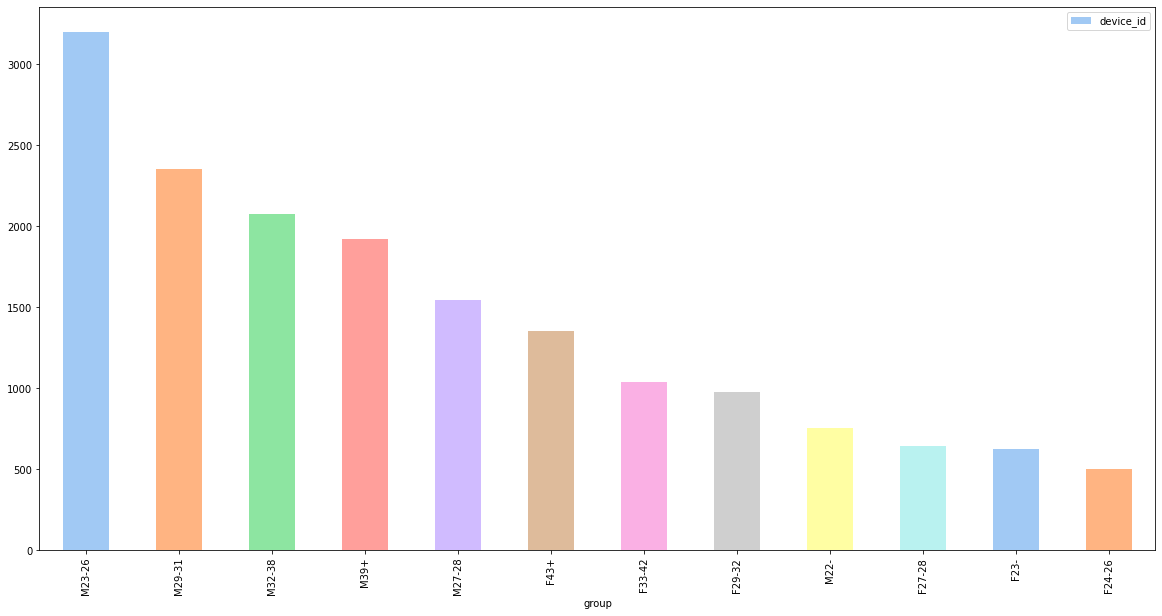

In [27]:
df_1.groupby('group')['device_id'].agg('count').reset_index().sort_values(by = 'device_id', ascending = False).plot.bar(x= 'group', y = 'device_id', figsize = (20, 10), color=sns.color_palette('pastel'))

Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender

In [28]:
df_1['phone_brand'].nunique()

26

In [29]:
#phone brands for age sengment
df_1.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Saturday,22
1,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Sunday,1


In [30]:
#distribution of phone brands across the gender
#df_1[['phone_brand','gender']].groupby(['phone_brand', 'gender']).agg('count').reset_index()

In [31]:
#Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender.
#Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands).
#Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands).

In [32]:
#distribution of phone brands across the gender(top 10 most used phone brands)
phone_brand_gender = pd.crosstab(df_1.phone_brand,df_1.gender)

In [36]:
phone_brand_gender.loc['Coolpad':'yōu mǐ'].sort_values(by='M',ascending=False)

gender,F,M
phone_brand,,
Samsung,1653,3051
Xiaomi,1556,2847
Huawei,958,1158
vivo,628,1153
OPPO,110,993
Meizu,105,850
Coolpad,80,679
HTC,3,333
LeEco,11,276


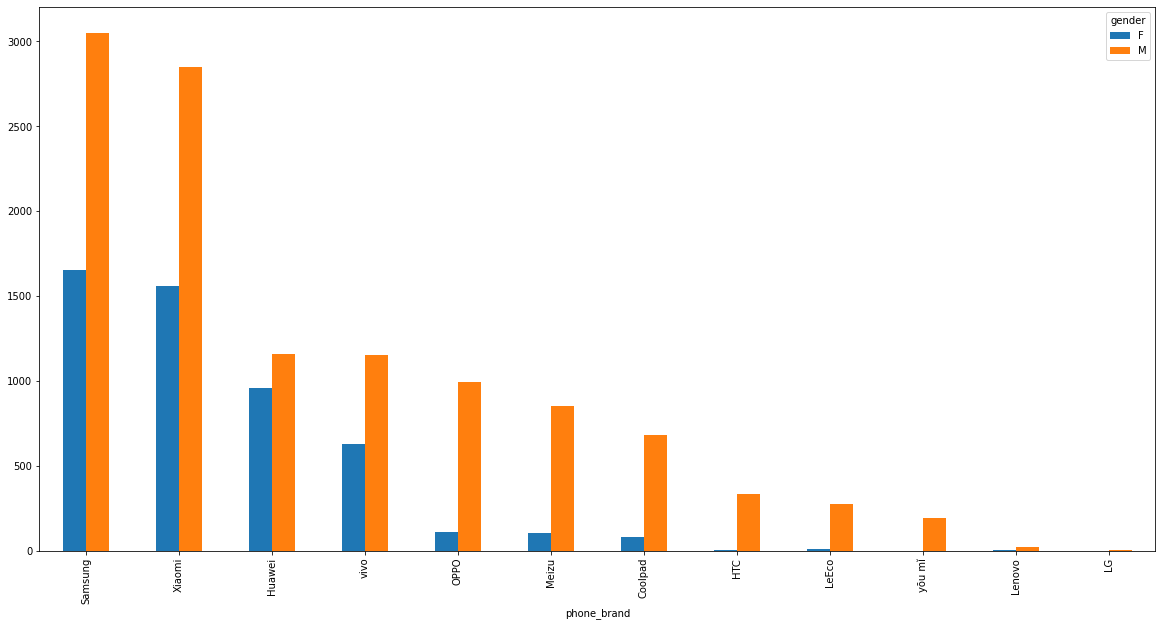

In [39]:
phone_brand_gender.loc['Coolpad':'yōu mǐ'].sort_values(by='M',ascending=False).plot(kind = 'bar',figsize=(20,10))
plt.show()

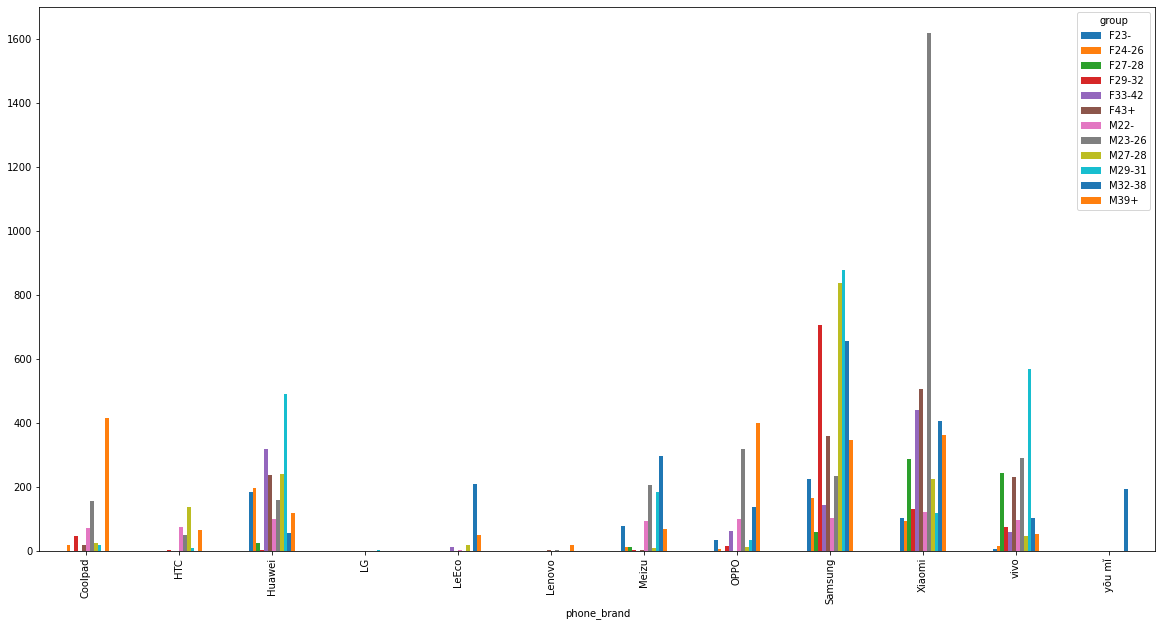

In [40]:
#Distribution of phone brands across age segment
phone_brand_group = pd.crosstab(df_1.phone_brand,df_1.group)
phone_brand_group.loc['Coolpad':'yōu mǐ'].plot(kind = 'bar', figsize = (20, 10))

In [41]:
##Distribution of phone brands across state

In [42]:
phone_brand_state = pd.crosstab(df_1.phone_brand,df_1.state)

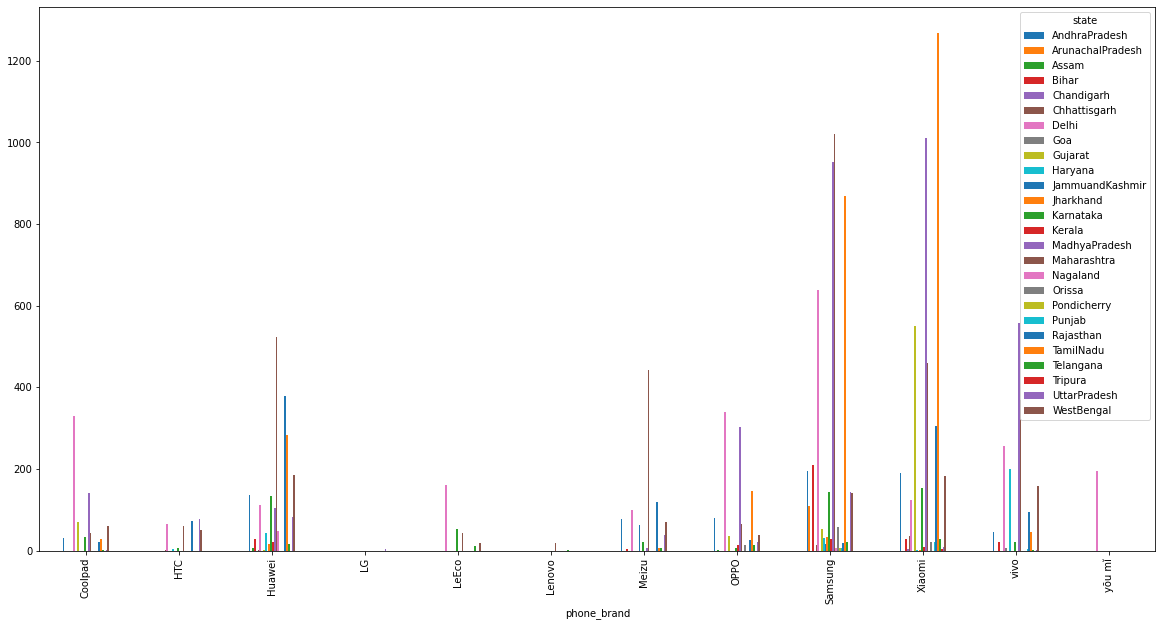

In [43]:
phone_brand_state.loc['Coolpad':'yōu mǐ'].plot(kind ='bar', figsize = (20, 10))

In [44]:
#Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands).

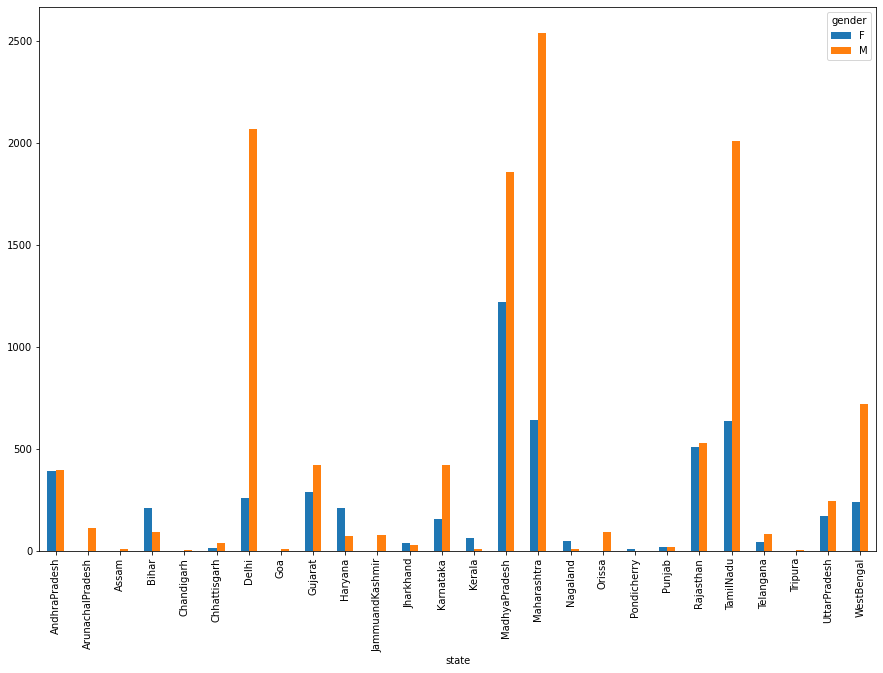

In [45]:
#distribution of gender for state
gender_state = pd.crosstab(df_1.state,df_1.gender)
gender_state.plot(kind = 'bar', figsize = (15, 10))

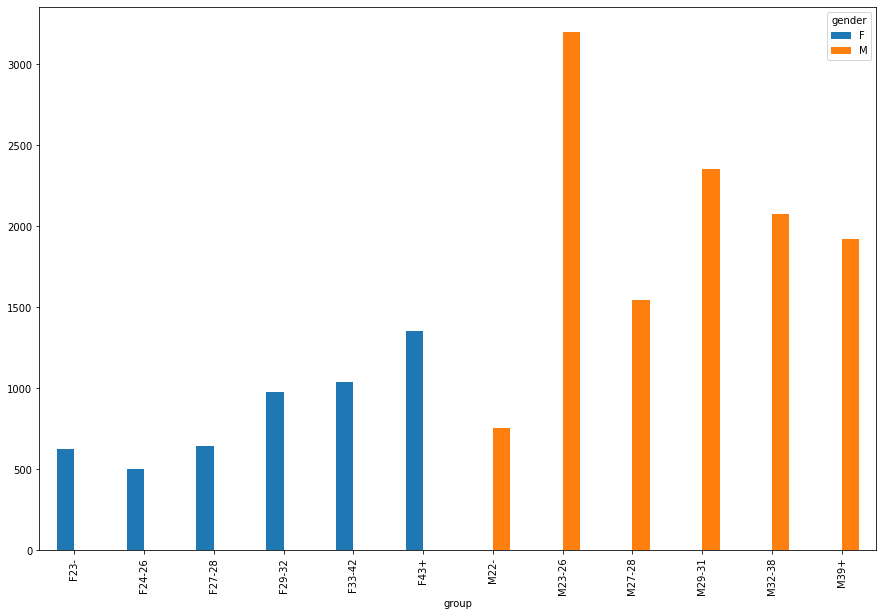

In [46]:
#distribution of gender for group
gender_group = pd.crosstab(df_1.group,df_1.gender)
gender_group.plot(kind = 'bar', figsize = (15, 10))

In [47]:
df_1.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,year,month,month_name,day_of_week,hour
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Saturday,22
1,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,35,M32-38,yōu mǐ,UIMI3,2016,5,May,Sunday,1


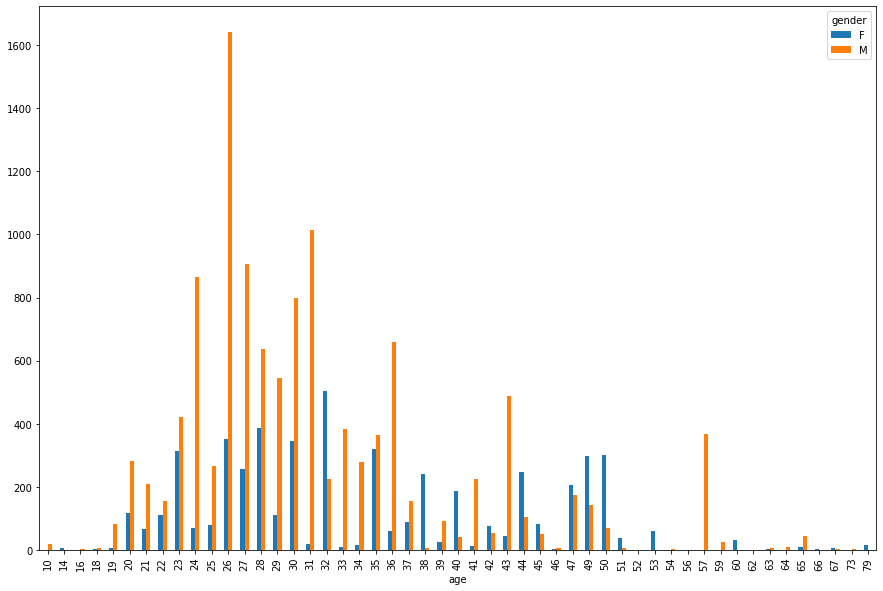

In [48]:
#distribution of gender for group
gender_age = pd.crosstab(df_1.age,df_1.gender)
gender_age.plot(kind = 'bar', figsize = (15, 10))

In [57]:
df=pd.crosstab(df_1.phone_brand,df_1.gender).sort_values(by=['M','F'],ascending=False)[:10]
df

gender,F,M
phone_brand,,
Samsung,1653,3051
Xiaomi,1556,2847
Huawei,958,1158
vivo,628,1153
OPPO,110,993
Meizu,105,850
Coolpad,80,679
HTC,3,333
LeEco,11,276


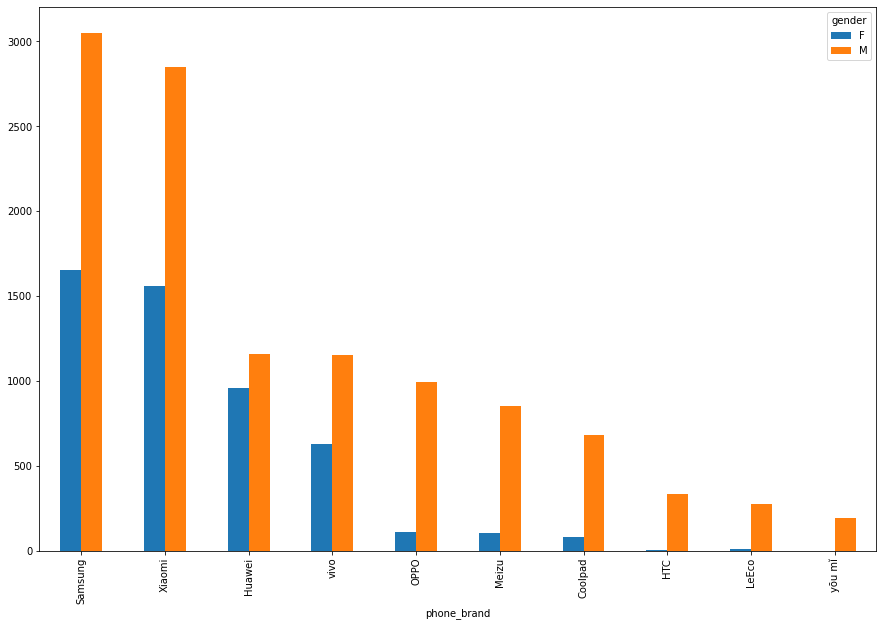

In [59]:
#distribution of gender for phone brand
df.plot(kind = 'bar', figsize = (15, 10))
plt.show()

Hourly distribution of Phone Calls.

In [67]:
df_1.groupby('hour').agg({'event_id':'count'}).reset_index()

,hour,event_id
0,0,557
1,1,359
2,2,211
3,3,171
4,4,154
5,5,244
6,6,490
7,7,745
8,8,947
9,9,859


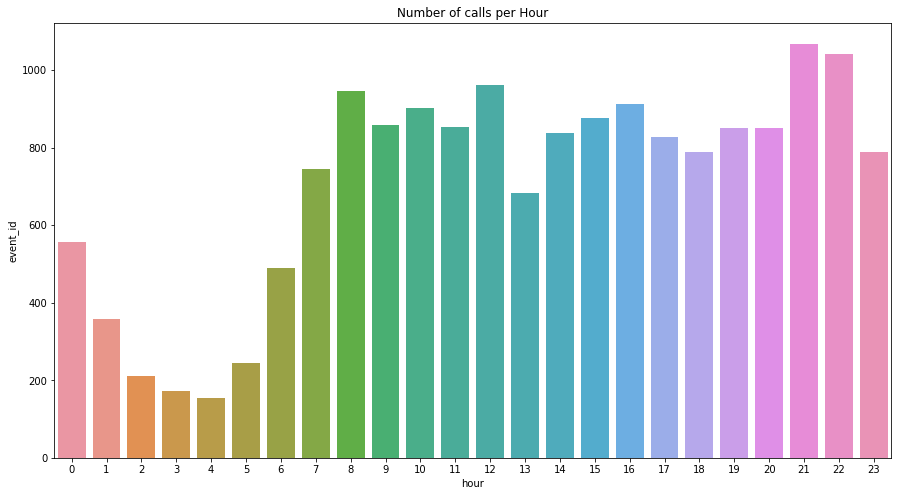

In [75]:
#df_1.head(1) #hour #phone calls count
fig,ax = plt.subplots(figsize=[15,8])
df_calls = df_1.groupby('hour').agg({'event_id':'count'}).reset_index()
sns.barplot(x='hour',y='event_id',data=df_calls)
plt.title('Number of calls per Hour')
plt.show()
